In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Reddit Science.ipynb
./reddit_data.csv
./Sheetal Report.docx
./.ipynb_checkpoints\Reddit Science-checkpoint.ipynb


In [2]:
posts = pd.read_csv('reddit_data.csv').drop(columns = ['Unnamed: 0', 'id', 'url', 'created']) 

In [3]:
posts.head()

,title,score,subreddit,num_comments,body,flair
0,"Attractive men, what type of attention do you ...",20,india,21,"xposted from /r/askmen, posted here because In...",AskIndia
1,[askindia] My brothers bank account was hacked...,42,india,64,My brother received bunch of SMS this morning ...,AskIndia
2,[AskIndia] What song is this ?,5,india,6,Often when I think of home there is a particul...,AskIndia
3,[AskIndia][Serious] Is it worth attempting imm...,55,india,115,Title. \n\nFrom what I understand based on arm...,AskIndia
4,[AskIndia] What are some cheap but reliable an...,21,india,25,I won't play games or edit videos.\n\nI will u...,AskIndia


In [4]:
posts.shape

(2510, 6)

In [5]:
posts.drop_duplicates(inplace = True)

In [6]:
posts.isnull().sum()

title             0
score             0
subreddit         0
num_comments      0
body            947
flair             0
dtype: int64

In [7]:
posts = posts[posts['body'].notna()]

In [8]:
posts.describe()

,score,num_comments
count,1563.000000,1563.000000
mean,104.763916,77.934741
std,661.375422,444.148759
min,0.000000,0.000000
25%,8.000000,6.000000
50%,23.000000,16.000000
75%,81.000000,52.000000
max,17900.000000,10799.000000


In [9]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 0 to 2509
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1563 non-null   object
 1   score         1563 non-null   int64 
 2   subreddit     1563 non-null   object
 3   num_comments  1563 non-null   int64 
 4   body          1563 non-null   object
 5   flair         1563 non-null   object
dtypes: int64(2), object(4)
memory usage: 85.5+ KB


In [10]:
posts['flair'].value_counts()

AskIndia              224
Business/Finance      188
AMA                   180
Scheduled             154
Policy/Economy        143
Photography           137
Science/Technology    133
Sports                128
Non-Political         109
Politics               89
Food                   78
Name: flair, dtype: int64

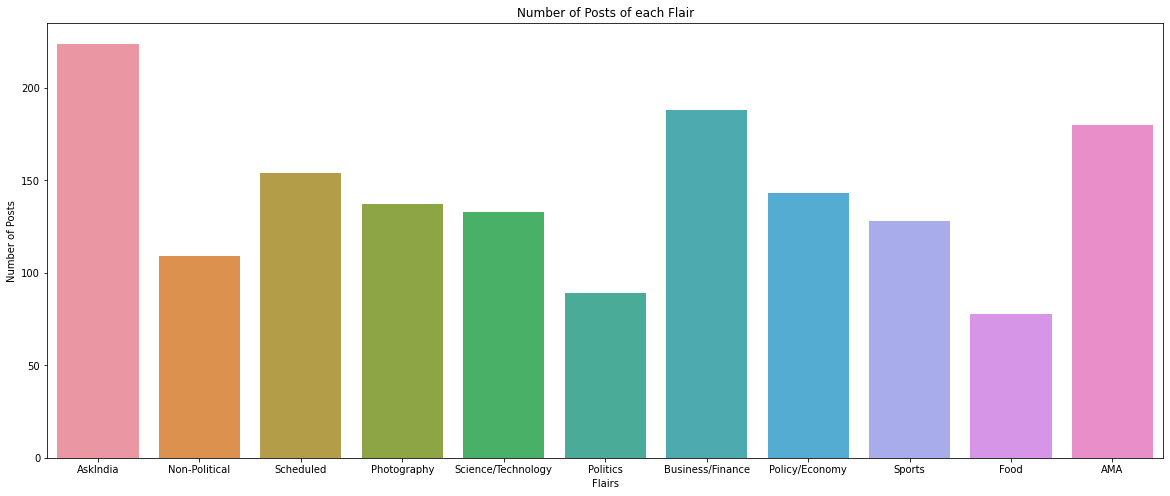

In [11]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'flair', data = posts)
plt.title("Number of Posts of each Flair")
plt.xlabel('Flairs')
plt.ylabel("Number of Posts")
plt.show()

In [12]:
posts['num_comments'].sum()/posts.shape[0]

77.93474088291747

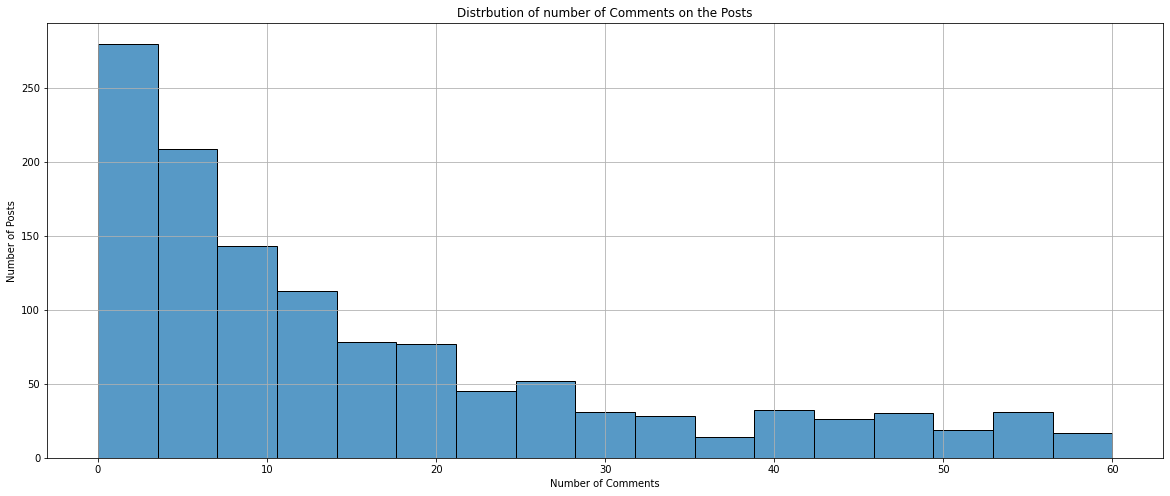

In [13]:
plt.figure(figsize = (20, 8))
sns.histplot(posts[posts["num_comments"] < 61]["num_comments"], kde = False)
plt.grid()
plt.title("Distrbution of number of Comments on the Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Number of Comments")
plt.show()

In [14]:
posts['score'].sum()/posts.shape[0]

104.76391554702495

<Figure size 1440x576 with 0 Axes>

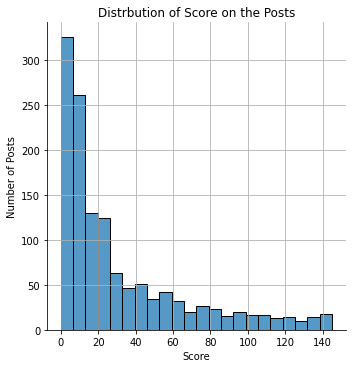

In [15]:
plt.figure(figsize = (20, 8))
sns.displot(posts[posts["score"] < 147]["score"], kde = False)
plt.grid()
plt.title("Distrbution of Score on the Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Score")
plt.show()

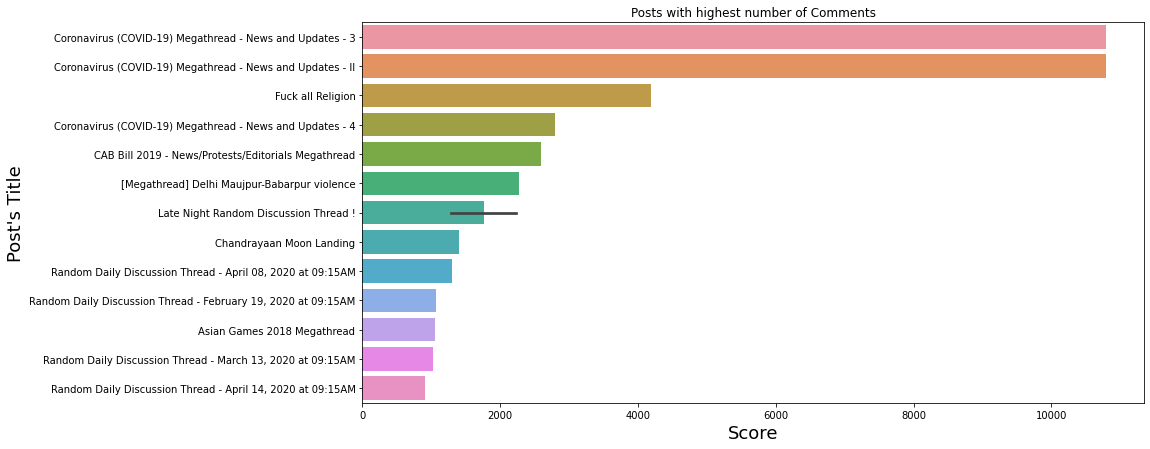

In [16]:
data_score = posts.sort_values('num_comments', ascending = False).head(15)
plt.figure(figsize = (14, 7))
plt.title("Posts with highest number of Comments")
sns.barplot(y = data_score['title'], x = data_score['num_comments'])
plt.xlabel('Score', fontsize = 18)
plt.ylabel("Post's Title", fontsize = 18)
plt.show()

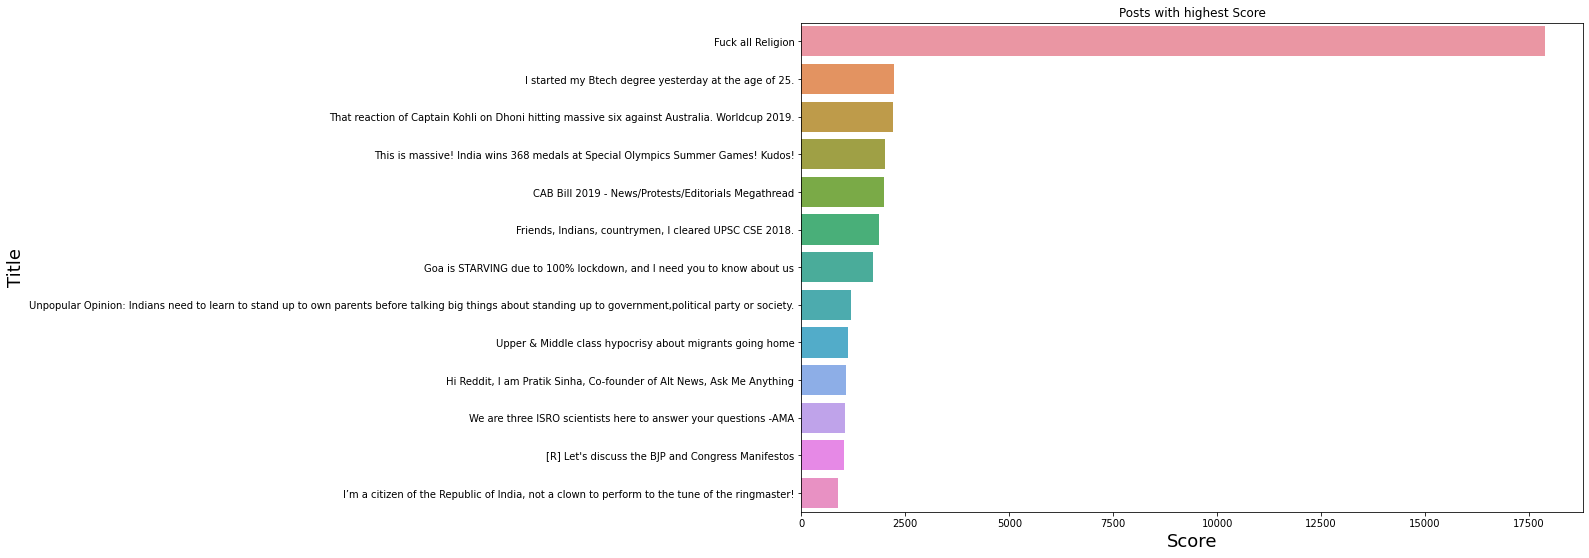

In [17]:
data_score = posts.sort_values('score', ascending = False).head(15)
plt.figure(figsize = (14, 9))
plt.title('Posts with highest Score')
sns.barplot(y = data_score['title'], x = data_score['score'])
plt.xlabel('Score', fontsize = 18)
plt.ylabel('Title', fontsize = 18)
plt.show()

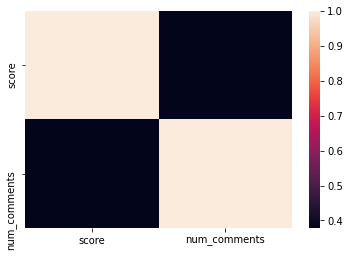

In [18]:
correlation =  posts.corr()
sns.heatmap(correlation)
plt.show()

In [19]:
X = posts.drop('flair', axis = 1)
y = posts['flair']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)

(1094, 5) (1094,)


In [22]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['body'])
X_train_counts.shape

(1094, 24395)

In [23]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1094, 24395)

In [24]:
mnb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('mnb', MultinomialNB())])
mnb = mnb.fit(X_train['body'], y_train)

In [25]:
mnb_pred = mnb.predict(X_test['body'])
mnb_pred_proba = mnb.predict_proba(X_test['body'])[:, 1]

In [26]:
svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svm', SVC(probability=True))])
svm = svm.fit(X_train['body'], y_train)

In [27]:
svm_pred = svm.predict(X_test['body'])
svm_pred_proba = svm.predict_proba(X_test['body'])[:, 1]

In [28]:
mlp = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('mlp', MLPClassifier())])
mlp = mlp.fit(X_train['body'], y_train)

In [29]:
mlp_pred = mlp.predict(X_test['body'])
mlp_pred_proba = mlp.predict_proba(X_test['body'])[:, 1]

In [30]:
print("For Multinomial NB: ", accuracy_score(y_test, mnb_pred))
print("For SVC: ", accuracy_score(y_test, svm_pred))
print("For Multi-layer Perceptron: ", accuracy_score(y_test, mlp_pred))

For Multinomial NB:  0.3006396588486141
For SVC:  0.3880597014925373
For Multi-layer Perceptron:  0.511727078891258


In [31]:
mnb_cm = confusion_matrix(y_test, mnb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
mlp_cm = confusion_matrix(y_test, mlp_pred)

<AxesSubplot:>

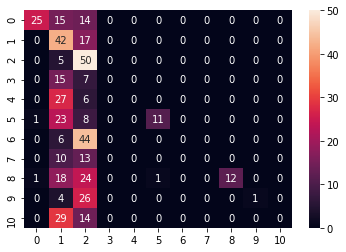

In [32]:
sns.heatmap(mnb_cm, annot=True)

<AxesSubplot:>

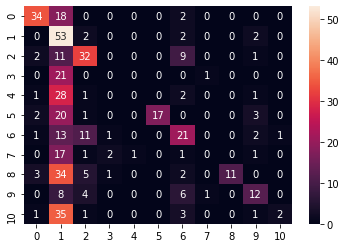

In [33]:
sns.heatmap(svm_cm, annot=True)

<AxesSubplot:>

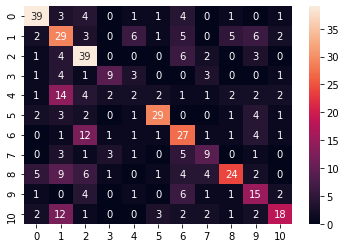

In [34]:
sns.heatmap(mlp_cm, annot=True)

In [35]:
print("For Multinomial NB: ", classification_report(y_test, mnb_pred, zero_division=1))
print("For SVM: ", classification_report(y_test, svm_pred, zero_division=1))
print("For Multi-layer Perceptron: ", classification_report(y_test, mlp_pred, zero_division=1))

For Multinomial NB:                      precision    recall  f1-score   support

               AMA       0.93      0.46      0.62        54
          AskIndia       0.22      0.71      0.33        59
  Business/Finance       0.22      0.91      0.36        55
              Food       1.00      0.00      0.00        22
     Non-Political       1.00      0.00      0.00        33
       Photography       0.92      0.26      0.40        43
    Policy/Economy       1.00      0.00      0.00        50
          Politics       1.00      0.00      0.00        23
         Scheduled       1.00      0.21      0.35        56
Science/Technology       1.00      0.03      0.06        31
            Sports       1.00      0.00      0.00        43

          accuracy                           0.30       469
         macro avg       0.84      0.24      0.19       469
      weighted avg       0.79      0.30      0.24       469

For SVM:                      precision    recall  f1-score   support

     

In [36]:
print(X_train.shape, y_train.shape)

(1094, 5) (1094,)


In [37]:
mnb_scores = cross_val_score(mnb, X_train['body'].values.reshape(1094), y_train.values.reshape(1094), cv=5)
svm_scores = cross_val_score(svm, X_train['body'].values.reshape(1094), y_train.values.reshape(1094), cv=5)
mlp_scores = cross_val_score(mlp, X_train['body'].values.reshape(1094), y_train.values.reshape(1094), cv=5)

In [38]:
print("For Multinomial NB: ", mnb_scores)
print("For SVM: ", svm_scores)
print("For Multi-layer Perceptron: ", mlp_scores)

For Multinomial NB:  [0.26940639 0.32876712 0.31506849 0.29680365 0.32110092]
For SVM:  [0.3652968  0.38812785 0.37442922 0.36986301 0.38990826]
For Multi-layer Perceptron:  [0.456621   0.51598174 0.52511416 0.50228311 0.55963303]
